### データロガーで測定した値を確認してみる。

In [1]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
os.getcwd()

'C:\\Users\\User\\Desktop\\支給品振動モータ使用_振動値測定'

In [3]:
#ファイル選択
df_recivedata = pd.read_csv(r"vibrationmoter_0002.CSV")

#頭と尻の10行づつ表示
display(df_recivedata.head(5))
display(df_recivedata.tail(5))

,Time,U1-1[V],U1-2[V],U1-3[V],U1-4[V],U1-5[V]
0,'21-12-02 13:08:01.162,0.993,1.42,1.60,1.53,1.49
1,'21-12-02 13:08:01.172,0.995,1.42,1.51,1.54,1.49
2,'21-12-02 13:08:01.182,0.999,1.52,1.50,1.53,1.50
3,'21-12-02 13:08:01.192,0.999,1.51,1.54,1.54,1.49
4,'21-12-02 13:08:01.202,0.999,1.42,1.59,1.53,1.49


,Time,U1-1[V],U1-2[V],U1-3[V],U1-4[V],U1-5[V]
33418,'21-12-02 13:13:35.342,0.994,1.45,1.47,1.53,1.49
33419,'21-12-02 13:13:35.352,0.996,1.43,1.58,1.52,1.49
33420,'21-12-02 13:13:35.362,0.999,1.47,1.54,1.53,1.48
33421,'21-12-02 13:13:35.372,1.000,1.43,1.47,1.52,1.49
33422,'21-12-02 13:13:35.382,1.000,1.49,1.57,1.53,1.49


### U1-1は瞬時流量4-20mAと249.3Ωを掛けて電圧値に直したもの。
### U1-2は加速度センサ1のX軸値、U1-3は加速度センサ1のY軸値。
### U1-4は加速度センサ2のX軸値、U1-5は加速度センサ2のY軸値。　である。

In [4]:
df_recivedata.count()

Time       33423
U1-1[V]    33423
U1-2[V]    33423
U1-3[V]    33423
U1-4[V]    33423
U1-5[V]    33423
dtype: int64

### データフレームの値に欠損値は無い。
### 瞬時流量の電圧値を実際の瞬時流量値(l/h)に直してみる。

In [5]:
#dfにカラムを追加（計算値）
df_recivedata['U2-1'] = ((df_recivedata['U1-1[V]'] * 250 / 249.3) - 1) * 7200 / 4

#頭と尻の10行づつ表示
display(df_recivedata.head(5))
display(df_recivedata.tail(5))

,Time,U1-1[V],U1-2[V],U1-3[V],U1-4[V],U1-5[V],U2-1
0,'21-12-02 13:08:01.162,0.993,1.42,1.60,1.53,1.49,-7.581227
1,'21-12-02 13:08:01.172,0.995,1.42,1.51,1.54,1.49,-3.971119
2,'21-12-02 13:08:01.182,0.999,1.52,1.50,1.53,1.50,3.249097
3,'21-12-02 13:08:01.192,0.999,1.51,1.54,1.54,1.49,3.249097
4,'21-12-02 13:08:01.202,0.999,1.42,1.59,1.53,1.49,3.249097


,Time,U1-1[V],U1-2[V],U1-3[V],U1-4[V],U1-5[V],U2-1
33418,'21-12-02 13:13:35.342,0.994,1.45,1.47,1.53,1.49,-5.776173
33419,'21-12-02 13:13:35.352,0.996,1.43,1.58,1.52,1.49,-2.166065
33420,'21-12-02 13:13:35.362,0.999,1.47,1.54,1.53,1.48,3.249097
33421,'21-12-02 13:13:35.372,1.000,1.43,1.47,1.52,1.49,5.054152
33422,'21-12-02 13:13:35.382,1.000,1.49,1.57,1.53,1.49,5.054152


### マイナスの瞬時流量は0にFIXする

In [6]:
df_recivedata.loc[df_recivedata['U2-1'] < 0, 'U2-1'] = 0 

In [7]:
#頭と尻の10行づつ表示
display(df_recivedata.head(5))
display(df_recivedata.tail(5))

,Time,U1-1[V],U1-2[V],U1-3[V],U1-4[V],U1-5[V],U2-1
0,'21-12-02 13:08:01.162,0.993,1.42,1.60,1.53,1.49,0.000000
1,'21-12-02 13:08:01.172,0.995,1.42,1.51,1.54,1.49,0.000000
2,'21-12-02 13:08:01.182,0.999,1.52,1.50,1.53,1.50,3.249097
3,'21-12-02 13:08:01.192,0.999,1.51,1.54,1.54,1.49,3.249097
4,'21-12-02 13:08:01.202,0.999,1.42,1.59,1.53,1.49,3.249097


,Time,U1-1[V],U1-2[V],U1-3[V],U1-4[V],U1-5[V],U2-1
33418,'21-12-02 13:13:35.342,0.994,1.45,1.47,1.53,1.49,0.000000
33419,'21-12-02 13:13:35.352,0.996,1.43,1.58,1.52,1.49,0.000000
33420,'21-12-02 13:13:35.362,0.999,1.47,1.54,1.53,1.48,3.249097
33421,'21-12-02 13:13:35.372,1.000,1.43,1.47,1.52,1.49,5.054152
33422,'21-12-02 13:13:35.382,1.000,1.49,1.57,1.53,1.49,5.054152


### 必要ない列は消す。

In [8]:
df_recivedata = df_recivedata.drop(["Time", "U1-1[V]"], axis = 1)

df_recivedata

,U1-2[V],U1-3[V],U1-4[V],U1-5[V],U2-1
0,1.42,1.60,1.53,1.49,0.000000
1,1.42,1.51,1.54,1.49,0.000000
2,1.52,1.50,1.53,1.50,3.249097
3,1.51,1.54,1.54,1.49,3.249097
4,1.42,1.59,1.53,1.49,3.249097
...,...,...,...,...,...
33418,1.45,1.47,1.53,1.49,0.000000
33419,1.43,1.58,1.52,1.49,0.000000
33420,1.47,1.54,1.53,1.48,3.249097
33421,1.43,1.47,1.52,1.49,5.054152


### 散布図行列を書いてみる

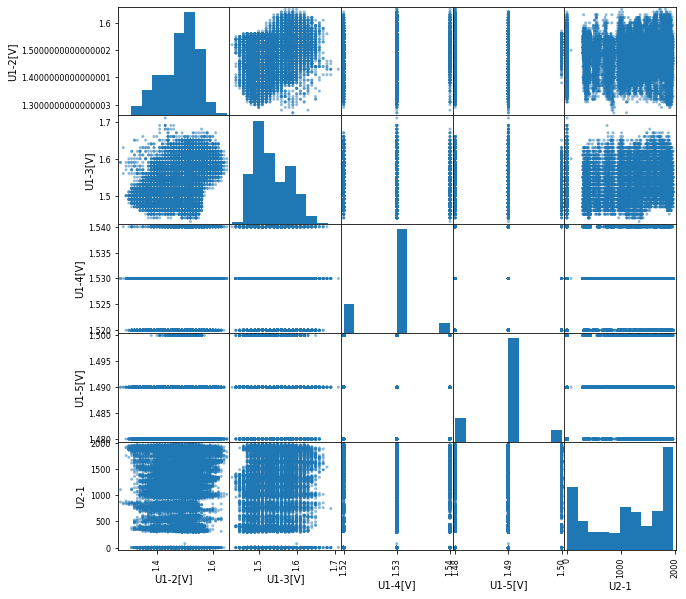

In [9]:
pd.plotting.scatter_matrix(df_recivedata, figsize=(10,10))
plt.show()

### 相関を見る。

In [10]:
df_recivedata.corr()

,U1-2[V],U1-3[V],U1-4[V],U1-5[V],U2-1
U1-2[V],1.000000,0.358585,0.191000,0.146548,0.079846
U1-3[V],0.358585,1.000000,-0.026073,-0.167844,0.132515
U1-4[V],0.191000,-0.026073,1.000000,-0.096734,0.042248
U1-5[V],0.146548,-0.167844,-0.096734,1.000000,0.043793
U2-1,0.079846,0.132515,0.042248,0.043793,1.000000


### ヒートマップにして表示する。

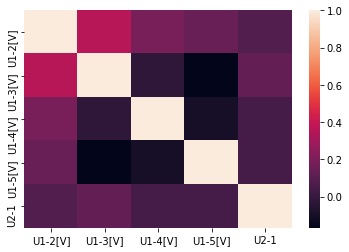

In [11]:
sns.heatmap(df_recivedata.corr())
plt.show()

### 相関が無い事が判った。